##### Оригинальная статья:
https://www.researchgate.net/publication/350811193_UWB-gestures_a_public_dataset_of_dynamic_hand_gestures_acquired_using_impulse_radar_sensors
https://www.nature.com/articles/s41597-021-00876-0

##### Данные:
https://figshare.com/articles/dataset/A_Public_Dataset_of_Dynamic_Hand-gestures_Acquired_using_Impulse-radar_sensors_/12652592

##### MATLAB:
https://www.mathworks.com/help/signal/ug/hand-gesture-classification-using-radar-signals-and-deep-learning.html

# UWB-gestures (жесты):
<h3 style="text-align: left;"><b>Подготовил:</b> Степанюк Денис Борисович</h3>

Данные записаны на 3 СШП радара <b>" XETHRU by NOVELDA X4M02 290056-010 "</b> расположеных слева, по центру и справа.

8 волонтёров записали по ~ 100 экземпляров 12 жестов, где 12-й жест это полное отсутсвие движения, снятых с трёх ракурсов.

1 экземпляр представляет собой двумерную матрицу записаную следующим образом:
- 20 раз в секунду радар присылает вектор с данными длинной 189.
- Запись одного движения занимает 4.5 секунды.
- За 4.5 секунду радар присылает 90 векторов длинной 189
- Вектора склеивают в матрицу 90х189 чтобы получить " изображение ".

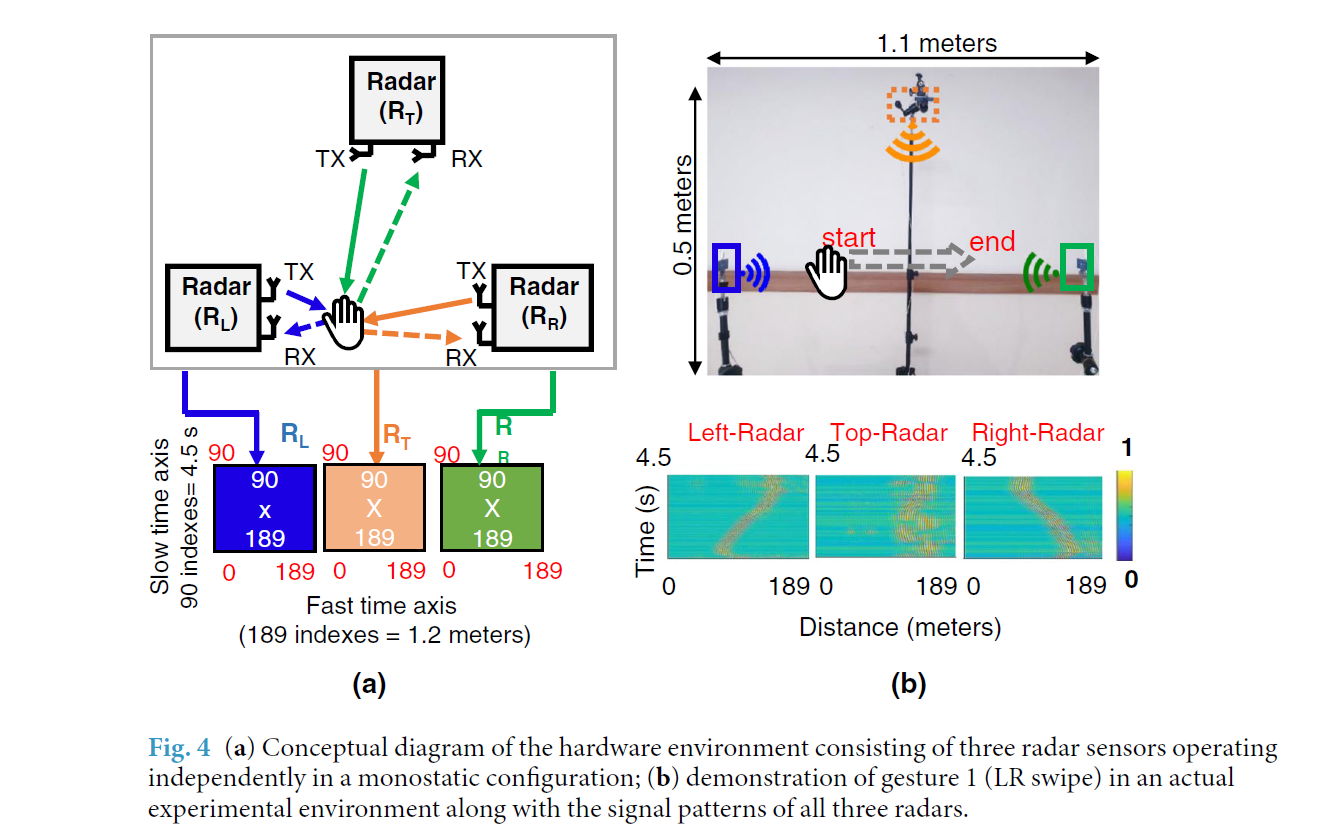

<h3 style="text-align: left;"><b>1.1 Загрузка данных:</b></h3>

In [1]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split

In [2]:
from numpy import genfromtxt
'''
zest(x, y, z) - конвертирует CSV экземпляр записаного сигнала в 2D numpy матрицу.


person - всего 8 добровольцев приняли участие в записи данных для датасета.

nomer - каждый доброволец записал по 12 разных жестов. Для каждого жеста каждый доброволец записал по 100 экземпляров.

clean: 
        0 - данные полные шумов.
        1 - очищенные от шумов данные.

'''

def zest(person, nomer, clean):

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1:
        beta = "Removed"
    else:
        beta = "Removed_"

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    gamma = "Data_HV0"  
    if person == 3:
        gamma = "Data_HV_0"
    if person == 6:
        gamma = "HC0"   

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1 or person == 6:
        alpha = "HV_0"
    else:
        alpha = "HV0"

    # Загрузить очищенные от шумов данные:
    if clean:
    
        path = "C:\\Users\\Deniss\\Desktop\\apio\\NN\\CSV_DataSet_Gestures\\"
    
        path_LeftRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_ClutterRemoved_100samples.csv"
    
        path_RightRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_ClutterRemoved_100samples.csv"
    
        path_CenterRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_ClutterRemoved_100samples.csv"
    
        data_LeftRadar = genfromtxt(path_LeftRadar_clean, delimiter=',')
        data_RightRadar = genfromtxt(path_RightRadar_clean, delimiter=',')
        data_CenterRadar = genfromtxt(path_CenterRadar_clean, delimiter=',')
        #print(path_LeftRadar_clean)
        #print(path_RightRadar_clean)
        #print(path_CenterRadar_clean)

    # Загрузить данные полные шумов:
    else:

        path = "C:\\Users\\Deniss\\Desktop\\apio\\NN\\CSV_DataSet_Gestures\\"

        path_LeftRadar_raw = path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_Raw_100samples.csv"

        path_RightRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_Raw_100samples.csv"

        path_CenterRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_Raw_100samples.csv"
        
        data_LeftRadar = genfromtxt(path_LeftRadar_raw, delimiter=',')
        data_RightRadar = genfromtxt(path_RightRadar_raw, delimiter=',')
        data_CenterRadar = genfromtxt(path_CenterRadar_raw, delimiter=',')
        
    return data_LeftRadar, data_RightRadar, data_CenterRadar

In [3]:
'''
Функия обьеденяет жесты от разных людей в общий массив, то есть можно обьеденить все жесты от всех людей
по категориям по 12 массивов на каждый ракурс.
'''
def zest_upload(nomer, clean):
    LeftRadar_all = []
    RightRadar_all = []
    CenterRadar_all = []
    for person in range(1,9):
        #(person, nomer, clean)
        LeftRadar_person, RightRadar_person, CenterRadar_person = zest(person, nomer, clean)

        LeftRadar_person, RightRadar_person, CenterRadar_person = LeftRadar_person.reshape(-1, 90, 189), \
                        RightRadar_person.reshape(-1, 90, 189), CenterRadar_person.reshape(-1, 90, 189)

        LeftRadar_all.append(LeftRadar_person)
        RightRadar_all.append(RightRadar_person)
        CenterRadar_all.append(CenterRadar_person)

    return np.vstack(LeftRadar_all), np.vstack(RightRadar_all), np.vstack(CenterRadar_all)

In [4]:
'''
raw - загрузим все данные полные шумов.
(person, nomer, clean)
'''

ZEST_1_LeftRadar_raw, ZEST_1_RightRadar_raw, ZEST_1_CenterRadar_raw = zest_upload(1, 0)

ZEST_2_LeftRadar_raw, ZEST_2_RightRadar_raw, ZEST_2_CenterRadar_raw = zest_upload(2, 0)

ZEST_3_LeftRadar_raw, ZEST_3_RightRadar_raw, ZEST_3_CenterRadar_raw = zest_upload(3, 0)

ZEST_4_LeftRadar_raw, ZEST_4_RightRadar_raw, ZEST_4_CenterRadar_raw = zest_upload(4, 0)

ZEST_5_LeftRadar_raw, ZEST_5_RightRadar_raw, ZEST_5_CenterRadar_raw = zest_upload(5, 0)

ZEST_6_LeftRadar_raw, ZEST_6_RightRadar_raw, ZEST_6_CenterRadar_raw = zest_upload(6, 0)

ZEST_7_LeftRadar_raw, ZEST_7_RightRadar_raw, ZEST_7_CenterRadar_raw = zest_upload(7, 0)

ZEST_8_LeftRadar_raw, ZEST_8_RightRadar_raw, ZEST_8_CenterRadar_raw = zest_upload(8, 0)

ZEST_9_LeftRadar_raw, ZEST_9_RightRadar_raw, ZEST_9_CenterRadar_raw = zest_upload(9, 0)

ZEST_10_LeftRadar_raw, ZEST_10_RightRadar_raw, ZEST_10_CenterRadar_raw = zest_upload(10, 0)

ZEST_11_LeftRadar_raw, ZEST_11_RightRadar_raw, ZEST_11_CenterRadar_raw = zest_upload(11, 0)

ZEST_12_LeftRadar_raw, ZEST_12_RightRadar_raw, ZEST_12_CenterRadar_raw = zest_upload(12, 0)

In [5]:
print(ZEST_1_LeftRadar_raw.shape)

(800, 90, 189)


In [6]:
'''
clean - очищенные от шумов данные.
(person, nomer, clean)
'''

ZEST_1_LeftRadar_clean, ZEST_1_RightRadar_clean, ZEST_1_CenterRadar_clean = zest_upload(1, 1)

ZEST_2_LeftRadar_clean, ZEST_2_RightRadar_clean, ZEST_2_CenterRadar_clean = zest_upload(2, 1)

ZEST_3_LeftRadar_clean, ZEST_3_RightRadar_clean, ZEST_3_CenterRadar_clean = zest_upload(3, 1)

ZEST_4_LeftRadar_clean, ZEST_4_RightRadar_clean, ZEST_4_CenterRadar_clean = zest_upload(4, 1)

ZEST_5_LeftRadar_clean, ZEST_5_RightRadar_clean, ZEST_5_CenterRadar_clean = zest_upload(5, 1)

ZEST_6_LeftRadar_clean, ZEST_6_RightRadar_clean, ZEST_6_CenterRadar_clean = zest_upload(6, 1)

ZEST_7_LeftRadar_clean, ZEST_7_RightRadar_clean, ZEST_7_CenterRadar_clean = zest_upload(7, 1)

ZEST_8_LeftRadar_clean, ZEST_8_RightRadar_clean, ZEST_8_CenterRadar_clean = zest_upload(8, 1)

ZEST_9_LeftRadar_clean, ZEST_9_RightRadar_clean, ZEST_9_CenterRadar_clean = zest_upload(9, 1)

ZEST_10_LeftRadar_clean, ZEST_10_RightRadar_clean, ZEST_10_CenterRadar_clean = zest_upload(10, 1)

ZEST_11_LeftRadar_clean, ZEST_11_RightRadar_clean, ZEST_11_CenterRadar_clean = zest_upload(11, 1)

ZEST_12_LeftRadar_clean, ZEST_12_RightRadar_clean, ZEST_12_CenterRadar_clean = zest_upload(12, 1)

In [7]:
print(ZEST_1_LeftRadar_clean.shape)

(800, 90, 189)


<h3 style="text-align: left;"><b>1.2 Графики отображение сигнала во времени с трёх ракурсов:</b></h3>

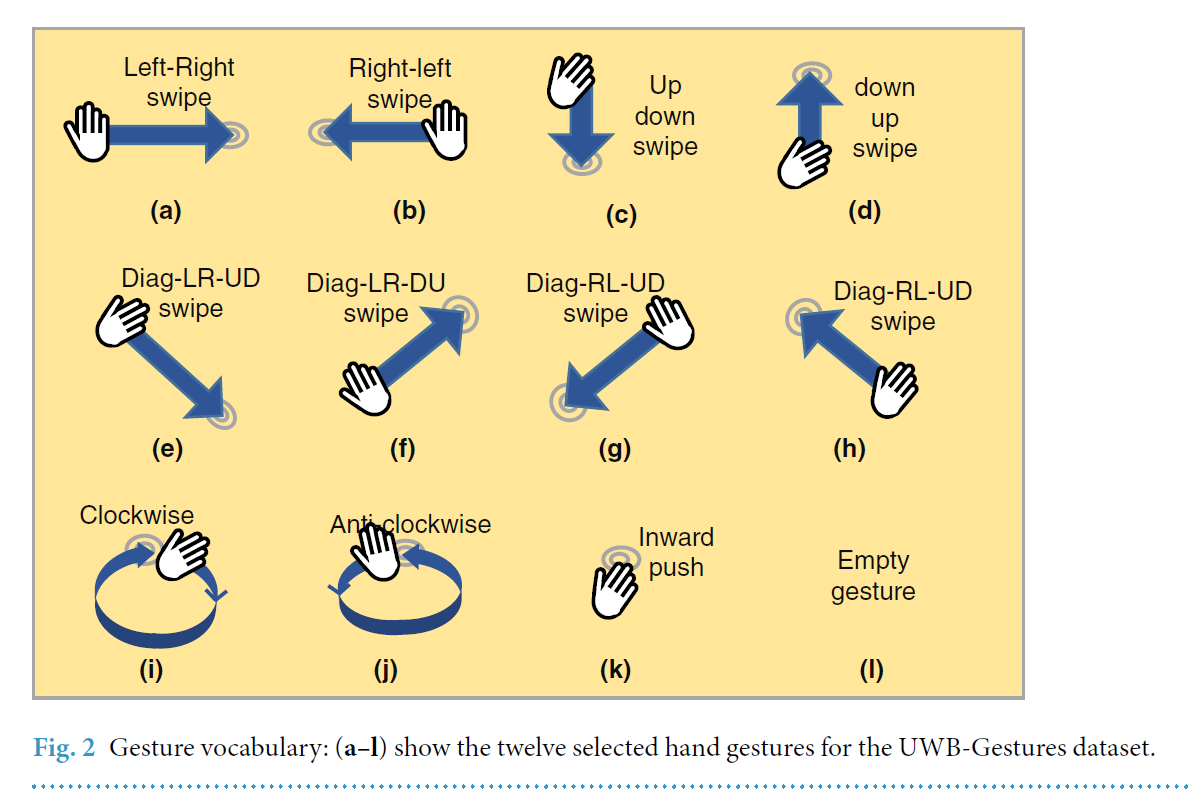

In [8]:
from matplotlib import pyplot as plt

def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

def three_point_of_view_plt(LeftRadar, RightRadar, CenterRadar, el):
    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(12, 12), sharey=True, sharex=True)

    Radar = [LeftRadar[el], RightRadar[el], CenterRadar[el]]
    Title = ["LeftRadar", "RightRadar", "CenterRadar"]
    i = 0
    
    for fig_x in ax.flatten():
        imshow(Radar[i], title=Title[i],plt_ax=fig_x)
        i += 1

### Left-Right swipe:

Radar (raw): gesture 1


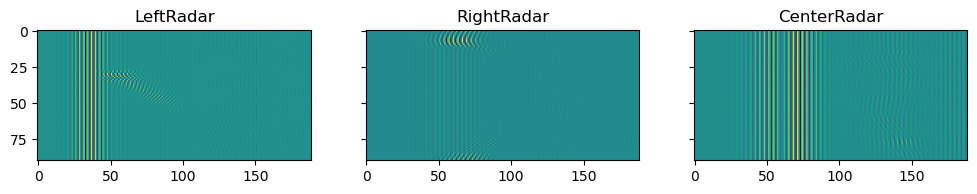

In [9]:
print("Radar (raw): gesture 1")
three_point_of_view_plt(ZEST_1_LeftRadar_raw, ZEST_1_RightRadar_raw, ZEST_1_CenterRadar_raw, 799)

Radar (clean): gesture 1


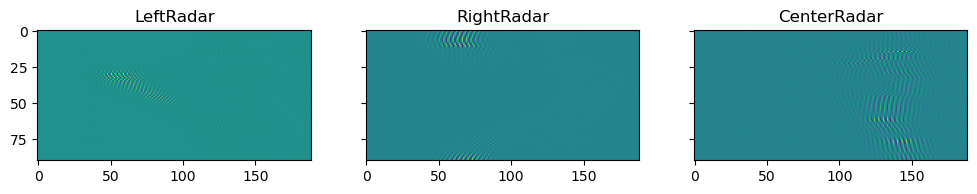

In [10]:
print("Radar (clean): gesture 1")
three_point_of_view_plt(ZEST_1_LeftRadar_clean, ZEST_1_RightRadar_clean, ZEST_1_CenterRadar_clean, 799)

### Right-Left swipe:

Radar (raw): gesture 2


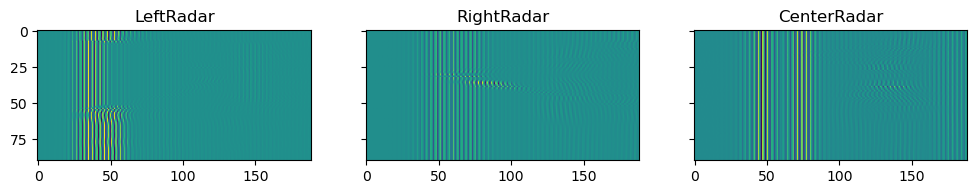

In [11]:
print("Radar (raw): gesture 2")
three_point_of_view_plt(ZEST_2_LeftRadar_raw, ZEST_2_RightRadar_raw, ZEST_2_CenterRadar_raw, 608)

Radar (clean): gesture 2


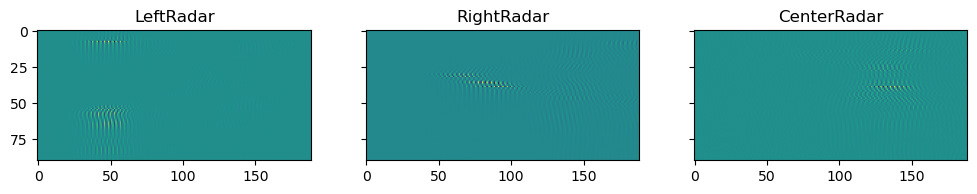

In [12]:
print("Radar (clean): gesture 2")
three_point_of_view_plt(ZEST_2_LeftRadar_clean, ZEST_2_RightRadar_clean, ZEST_2_CenterRadar_clean, 608)

### Up-Down swipe:

Radar (raw): gesture 3


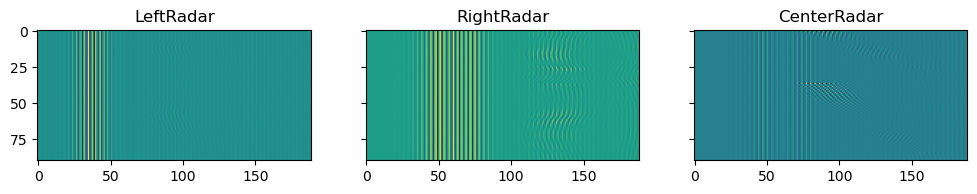

In [13]:
print("Radar (raw): gesture 3")
three_point_of_view_plt(ZEST_3_LeftRadar_raw, ZEST_3_RightRadar_raw, ZEST_3_CenterRadar_raw, 0)

Radar (clean): gesture 3


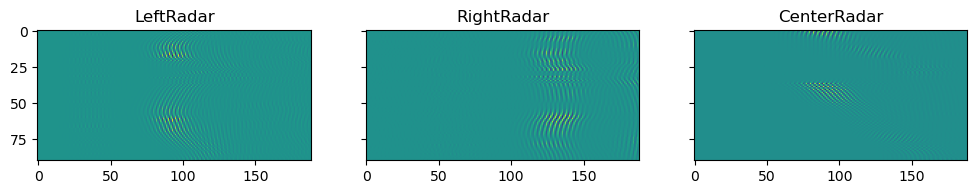

In [14]:
print("Radar (clean): gesture 3")
three_point_of_view_plt(ZEST_3_LeftRadar_clean, ZEST_3_RightRadar_clean, ZEST_3_CenterRadar_clean, 0)

### Down-Up swipe:

Radar (raw): gesture 4


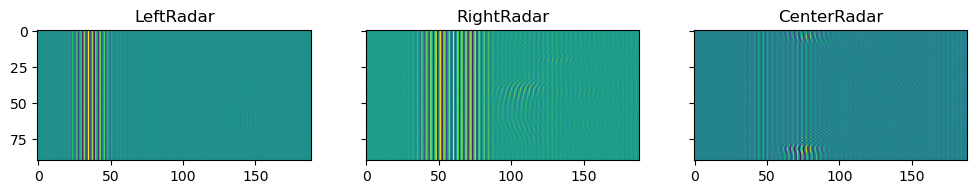

In [15]:
print("Radar (raw): gesture 4")
three_point_of_view_plt(ZEST_4_LeftRadar_raw, ZEST_4_RightRadar_raw, ZEST_4_CenterRadar_raw, 404)

Radar (clean): gesture 4


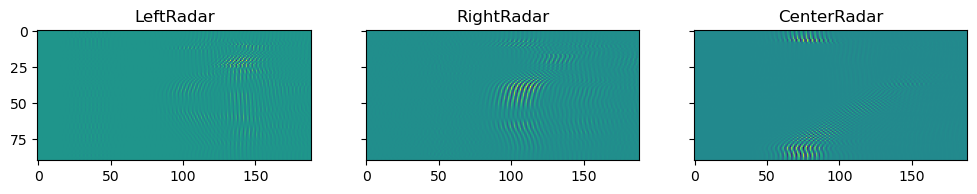

In [16]:
print("Radar (clean): gesture 4")
three_point_of_view_plt(ZEST_4_LeftRadar_clean, ZEST_4_RightRadar_clean, ZEST_4_CenterRadar_clean, 404)

### Diag-LR-UD swipe:

Radar (raw): gesture 5


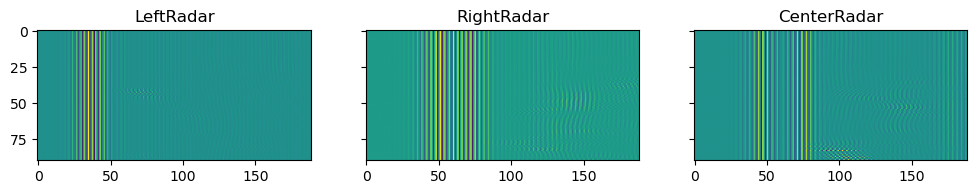

In [17]:
print("Radar (raw): gesture 5")
three_point_of_view_plt(ZEST_5_LeftRadar_raw, ZEST_5_RightRadar_raw, ZEST_5_CenterRadar_raw, 100)

Radar (clean): gesture 5


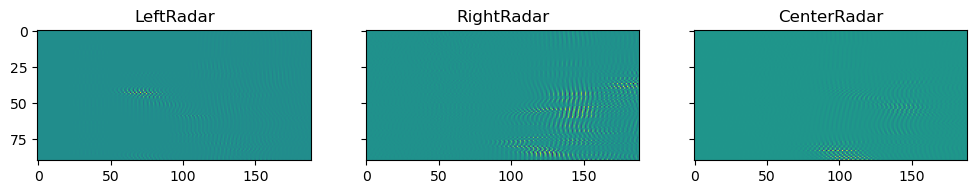

In [18]:
print("Radar (clean): gesture 5")
three_point_of_view_plt(ZEST_5_LeftRadar_clean, ZEST_5_RightRadar_clean, ZEST_5_CenterRadar_clean, 100)

### Diag-LR-DU swipe:

Radar (raw): gesture 6


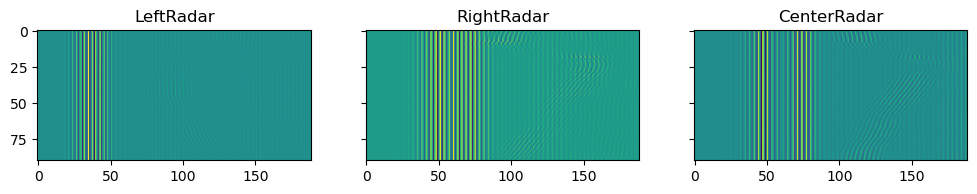

In [19]:
print("Radar (raw): gesture 6")
three_point_of_view_plt(ZEST_6_LeftRadar_raw, ZEST_6_RightRadar_raw, ZEST_6_CenterRadar_raw, 66)

Radar (clean): gesture 6


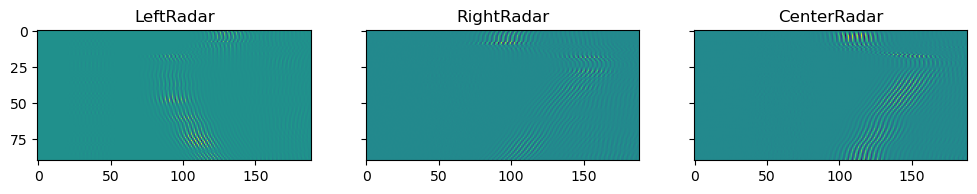

In [20]:
print("Radar (clean): gesture 6")
three_point_of_view_plt(ZEST_6_LeftRadar_clean, ZEST_6_RightRadar_clean, ZEST_6_CenterRadar_clean, 66)

### Diag-RL-UD swipe:

Radar (raw): gesture 7


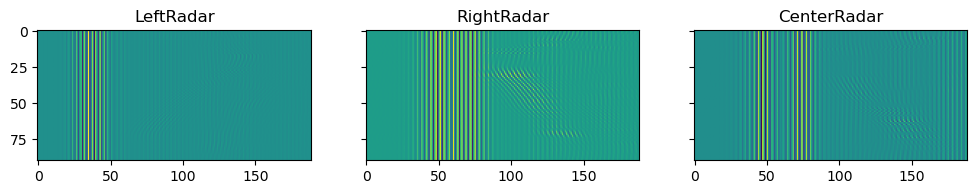

In [21]:
print("Radar (raw): gesture 7")
three_point_of_view_plt(ZEST_7_LeftRadar_raw, ZEST_7_RightRadar_raw, ZEST_7_CenterRadar_raw, 405)

Radar (clean): gesture 7


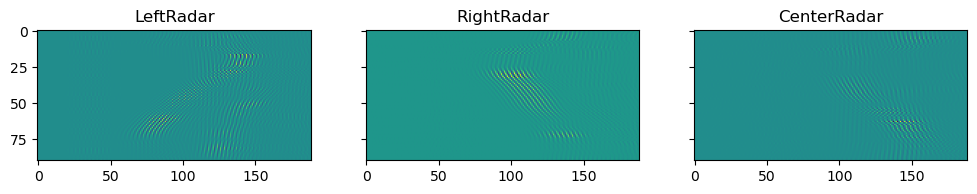

In [22]:
print("Radar (clean): gesture 7")
three_point_of_view_plt(ZEST_7_LeftRadar_clean, ZEST_7_RightRadar_clean, ZEST_7_CenterRadar_clean, 405)

### Diag-RL-DU swipe:

Radar (raw): gesture 8


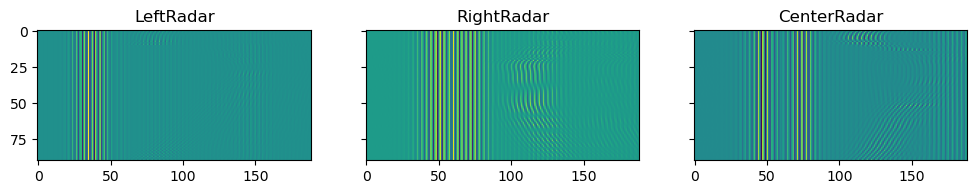

In [23]:
print("Radar (raw): gesture 8")
three_point_of_view_plt(ZEST_8_LeftRadar_raw, ZEST_8_RightRadar_raw, ZEST_8_CenterRadar_raw, 8)

Radar (clean): gesture 8


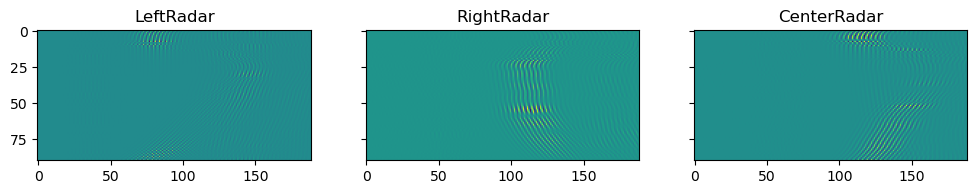

In [24]:
print("Radar (clean): gesture 8")
three_point_of_view_plt(ZEST_8_LeftRadar_clean, ZEST_8_RightRadar_clean, ZEST_8_CenterRadar_clean, 8)

### Clockwise

Radar (raw): gesture 9


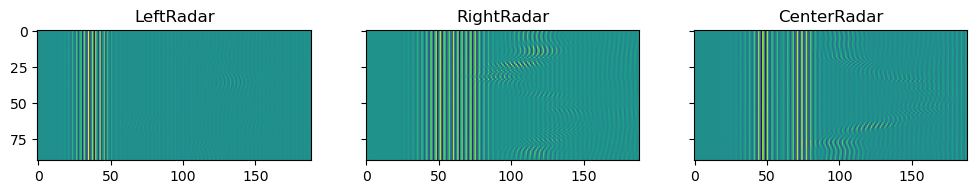

In [25]:
print("Radar (raw): gesture 9")
three_point_of_view_plt(ZEST_9_LeftRadar_raw, ZEST_9_RightRadar_raw, ZEST_9_CenterRadar_raw, 99)

Radar (clean): gesture 9


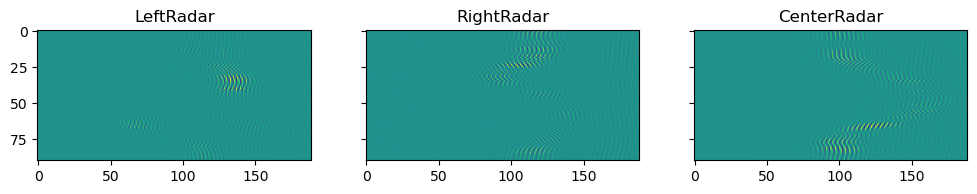

In [26]:
print("Radar (clean): gesture 9")
three_point_of_view_plt(ZEST_9_LeftRadar_clean, ZEST_9_RightRadar_clean, ZEST_9_CenterRadar_clean, 99)

### Anti-clockwise

Radar (raw): gesture 10


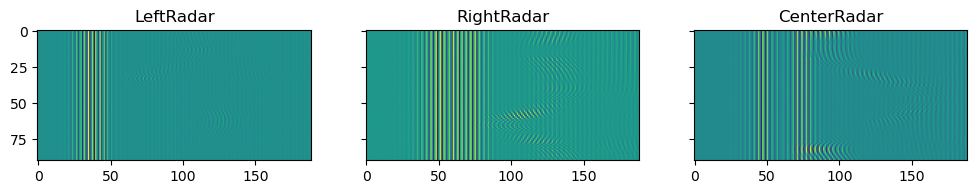

In [27]:
print("Radar (raw): gesture 10")
three_point_of_view_plt(ZEST_10_LeftRadar_raw, ZEST_10_RightRadar_raw, ZEST_10_CenterRadar_raw, 70)

Radar (clean): gesture 10


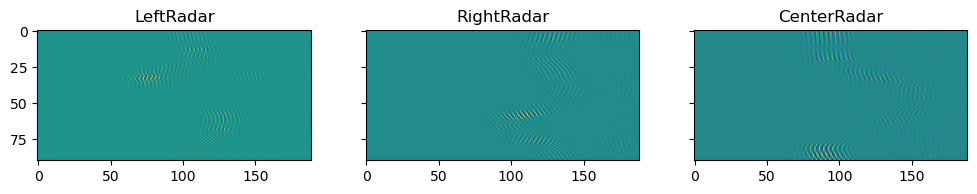

In [28]:
print("Radar (clean): gesture 10")
three_point_of_view_plt(ZEST_10_LeftRadar_clean, ZEST_10_RightRadar_clean, ZEST_10_CenterRadar_clean, 70)

### Inward push

Radar (raw): gesture 11


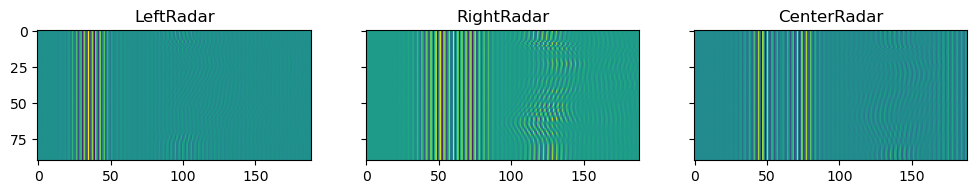

In [29]:
print("Radar (raw): gesture 11")
three_point_of_view_plt(ZEST_11_LeftRadar_raw, ZEST_11_RightRadar_raw, ZEST_1_CenterRadar_raw, 112)

Radar (clean): gesture 11


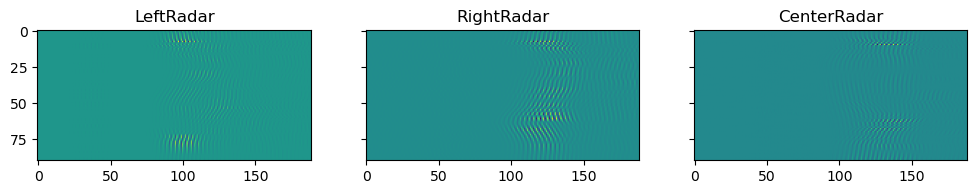

In [30]:
print("Radar (clean): gesture 11")
three_point_of_view_plt(ZEST_11_LeftRadar_clean, ZEST_11_RightRadar_clean, ZEST_11_CenterRadar_clean, 112)

### Empty

Radar (raw): gesture 12


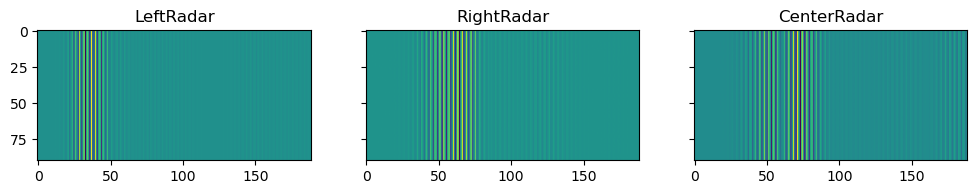

In [31]:
print("Radar (raw): gesture 12")
three_point_of_view_plt(ZEST_12_LeftRadar_raw, ZEST_12_RightRadar_raw, ZEST_12_CenterRadar_raw, 700)

Radar (clean): gesture 12


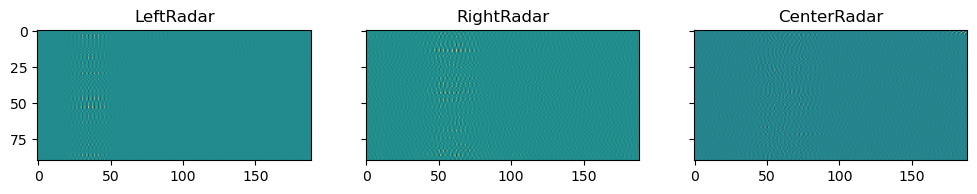

In [32]:
print("Radar (clean): gesture 12")
three_point_of_view_plt(ZEST_12_LeftRadar_clean, ZEST_12_RightRadar_clean, ZEST_12_CenterRadar_clean, 700)